### Linear Regression

Step 1: Libraries ခေါ်ယူခြင်း (Importing Libraries)
-   Data Analysis နှင့် Visualization လုပ်ငန်းစဉ်များအတွက် မရှိမဖြစ်လိုအပ်သော Tools (Libraries) များကို Python env ထဲသို့ ခေါ်ယူလိုက်ခြင်း ဖြစ်သည်။

In [1]:
import pandas as pd         
from sklearn import datasets 

Step 2: စမ်းသပ်ရန် Data ဖန်တီးခြင်း (Generating Synthetic Data)
-   ဒီအဆင့်မှာတော့ Regression ပုစ္ဆာတစ်ခုကို လေ့ကျင့်နိုင်ဖို့အတွက် Python သုံးပြီး (Random Data) များကို ကိုယ်တိုင်ဖန်တီးလိုက်တာ ဖြစ်ပါတယ်

In [4]:
# creating the random data
# နမူနာ ၃၀၀၊ Feature ၁ ခုနှင့်  (Noise) ၃၀ ပါဝင်သော Regression Data များ ထုတ်ယူခြင်း
X, y = datasets.make_regression(n_samples=300, n_features=1, noise=30)

# ရရှိလာသော array များကို DataFrame (Table) အဖြစ် ပြောင်းလဲခြင်း
df = pd.DataFrame(X, y)

# Index ကို Column အဖြစ် ပြောင်းလဲပြီး နာမည်အမှန် ပြန်ပေးခြင်း
df.reset_index(inplace=True) # Index ကို ပုံမှန် column အဖြစ် ပြန်ထားခြင်း
df.rename(columns={'index':'x' , 0:'y' }, inplace=True) # Column နာမည်များကို x နှင့် y ဟု ပြောင်းခြင်း

# Data ၏ ပထမဆုံး ၅ ကြောင်းကို ထုတ်ကြည့်ခြင်း
df.head()

,x,y
0,3.057285,-0.204632
1,-8.710688,-0.818251
2,-35.234027,-0.225798
3,7.762373,-1.737511
4,-71.724483,-1.154277


Step 3: Data Visualization (ဒေတာများကို ပုံဖော်ကြည့်ခြင်း)
-   ဖန်တီးလိုက်တဲ့ x နဲ့ y တို့ကြားမှာ ဘယ်လို ဆက်စပ်မှု (Relationship) ရှိနေသလဲဆိုတာကို Scatter Plot အစက်ချပုံစံနဲ့ မြင်သာအောင် ကြည့်ရှုတဲ့ အဆင့်ဖြစ်ပါတယ်။

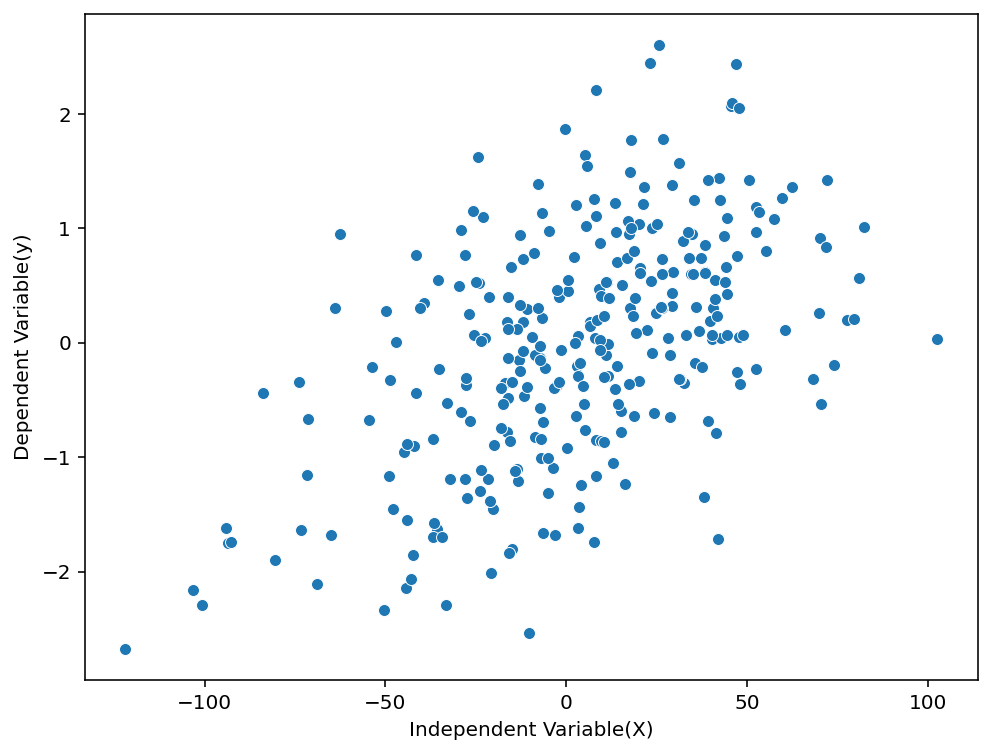

In [8]:
import seaborn as sns    
import matplotlib.pyplot as plt 

# visualize the data using scatter plot
plt.figure(figsize=(8,6))

# Seaborn ကိုသုံးပြီး x နှင့် y ၏ ဆက်စပ်မှုကို အစက်ချပုံစံဖြင့် ဆွဲခြင်း
sns.scatterplot(x=df.x, y=df.y)

# X-axis နှင့် Y-axis တို့တွင် နာမည်များ သတ်မှတ်ပေးခြင်း
plt.xlabel("Independent Variable(X)")
plt.ylabel("Dependent Variable(y)")

# ဖန်တီးထားသော ပုံကို ထုတ်ပြခြင်း
plt.show()

Step 4: ပျမ်းမျှတန်ဖိုးများ တွက်ချက်ခြင်း (Calculating Mean Values)
-   Linear Regression မျဉ်းကြောင်း၏ Slope နှင့် Intercept တို့ကို ကိုယ်တိုင် (Manual) တွက်ချက်ရန်အတွက် ပထမဦးဆုံးလိုအပ်သော $x$ နှင့် $y$ တို့၏ ပျမ်းမျှတန်ဖိုး (Mean) များကို ရှာဖွေသည့် အဆင့်ဖြစ်ပါတယ်။

In [10]:
 # calculate slope and intercept
mean_x=df.x.mean()
mean_y=df.y.mean()

mean_x , mean_y

(3.5641474592435785, -0.022584938158473237)

Step 5: Slope နှင့် Intercept ကို တွက်ချက်ခြင်း (Calculating Slope and Intercept)
-   Linear Regression မျဉ်းကြောင်းတစ်ခု၏ ပုံသေနည်းဖြစ်သော $y = mx + c$ တွင် ပါဝင်သည့် Slope ($m$) နှင့် Intercept ($c$) တန်ဖိုးများကို ပုံသေနည်း (Least Squares Method) အသုံးပြုကာ ကိုယ်တိုင်တွက်ချက်သည့် အဆင့်ဖြစ်ပါသည်။

In [12]:
# slope (m) ကို တွက်ချက်ခြင်း
# အပေါ်ကိန်း (Numerator): (x - mean_x) နှင့် (y - mean_y) တို့၏ မြှောက်လဒ်များကို ပေါင်းခြင်း
numerator = sum((df.x - mean_x) * (df.y - mean_y))

# အောက်ကိန်း (Denominator): (x - mean_x) နှစ်ထပ်ကိန်းများကို ပေါင်းခြင်း
denomenator = sum((df.x - mean_x)**2)

# Slope တန်ဖိုးကို ရှာဖွေခြင်း
slope = numerator / denomenator
print('Slope:', slope)

# intercept (c) ကို တွက်ချက်ခြင်း
# c = mean_y - (slope * mean_x) ပုံသေနည်းကို သုံးခြင်း
intercept = mean_y - (slope * mean_x)
print('Intercept:', intercept)

Slope: 0.014445471945583972
Intercept: -0.07407073029090074


Step 6: Prediction (ခန့်မှန်းချက်များ တွက်ချက်ခြင်း)
-   အရှေ့အဆင့်မှာ ရရှိခဲ့တဲ့ Slope ($m$) နဲ့ Intercept ($c$ သို့မဟုတ် $b$) တန်ဖိုးတွေကို အသုံးပြုပြီး Linear Regression ပုံသေနည်း $y = mx + b$ အတိုင်း ခန့်မှန်းရလဒ် (Predicted Values) များကို တွက်ချက်တဲ့ အဆင့်ဖြစ်ပါတယ်။

In [14]:
# y = mx + b (Linear Regression ပုံသေနည်း)

# ရရှိထားသော slope နှင့် intercept ကိုသုံးပြီး y တန်ဖိုးများကို ခန့်မှန်းခြင်း
y_pred_cal = (slope * df.x) + intercept

# ခန့်မှန်းရရှိလာသော y တန်ဖိုးများကို ထုတ်ကြည့်ခြင်း
y_pred_cal

# ခန့်မှန်းချက်အသစ်ကို column တစ်ခုအနေနဲ့ ထည့်လိုက်ပါ
df['y_predicted'] = (slope * df.x) + intercept

# ပထမဆုံး ၅ တန်းကိုပဲ ထုတ်ကြည့်ပါ
print(df[['x', 'y_predicted']].head())

           x  y_predicted
0   3.057285    -0.029907
1  -8.710688    -0.199901
2 -35.234027    -0.583043
3   7.762373     0.038060
4 -71.724483    -1.110165


Step 7: Regression Line (ခန့်မှန်းမျဉ်းကြောင်း) ကို ပုံဖော်ကြည့်ခြင်

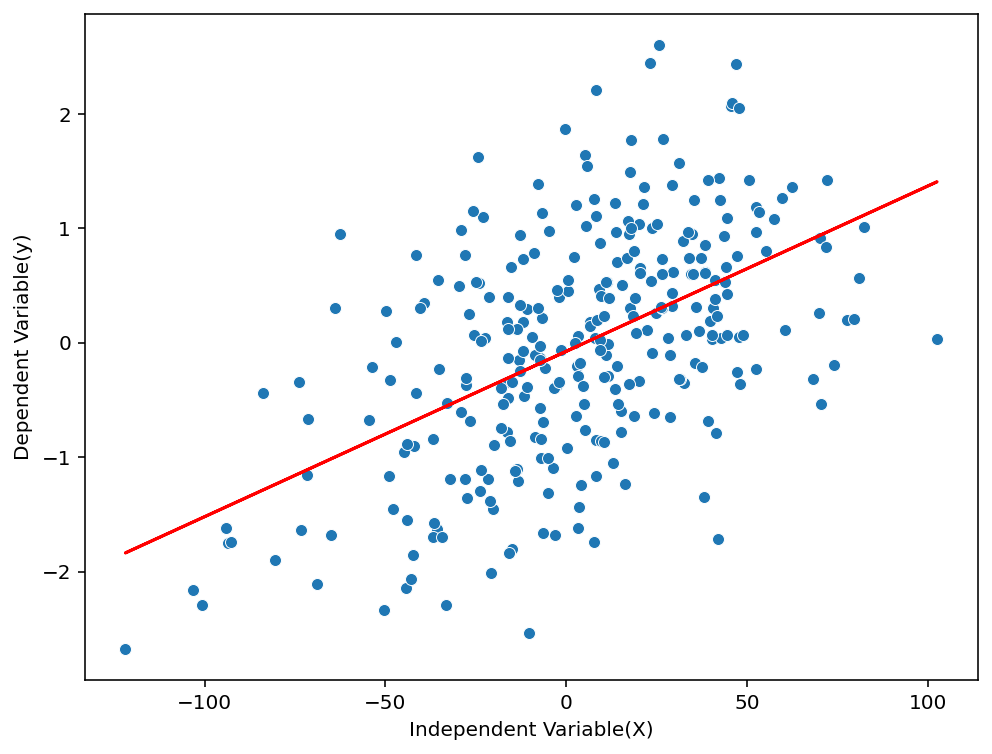

In [16]:
# plot the predicted line
# ပုံ၏ အရွယ်အစားကို အလျား ၈ လက်မ၊ အနံ ၆ လက်မ သတ်မှတ်ခြင်း
plt.figure(figsize=(8,6))

# မူလ Data (x, y) များကို အပြာရောင် အစက်ကလေးများဖြင့် အရင်ဆွဲခြင်း
sns.scatterplot(x=df.x, y=df.y)

# ခန့်မှန်းရရှိထားသော y_pred_cal ကို အသုံးပြုပြီး အနီရောင်မျဉ်းဖြောင့် ('r-') ဆွဲခြင်း
plt.plot(df.x, y_pred_cal, 'r-')

# X-axis နှင့် Y-axis တို့တွင် နာမည်များ သတ်မှတ်ခြင်း
plt.xlabel("Independent Variable(X)")
plt.ylabel("Dependent Variable(y)")

# ပုံကို ထုတ်ပြခြင်း
plt.show()

# Work on actual data

Step 8: Fish Dataset ကို ဖတ်ယူခြင်း (Loading the Fish Dataset)
-   ယခုတစ်ခါတွင် (Synthetic Data) အစား တကယ့်လက်တွေ့လောကမှ ငါးများ၏ ကိုယ်အလေးချိန်နှင့် အရွယ်အစားများကို တိုင်းတာထားသည့် Fish Dataset ကို အသုံးပြုပြီး Regression လေ့ကျင့်ခန်း ဆက်လုပ်မှာဖြစ်ပါတယ်။

In [18]:
#   Data ကို ဖတ်မယ်
df = pd.read_csv(r'C:\Users\MSI\Desktop\Git_Project\AI_2026\Day06 Liner and logistic Regression, Perceptron, train and test\example\Fish.csv')
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


Step 9: Features နှင့် Target ခွဲခြားခြင်း (Splitting Features and Target)

In [21]:
X = df[['Length2']] # Predictor (ငါးအလျား)
y = df['Weight']    # Target (ငါးအလေးချိန်)

Step 10: Visualizing Raw Data
-   Machine Learning ရဲ့ ပထမအဆင့်အနေနဲ့ ကျွန်ုပ်တို့ဆီမှာရှိတဲ့ မူလငါးအချက်အလက် (Actual Data) တွေကို Graph ပေါ်မှာ အစက်လေးတွေအဖြစ် ချကြည့်ပြီး ဒေတာတွေရဲ့ ပြန့်ကျဲပုံကို စစ်ဆေးတာဖြစ်ပါတယ်။

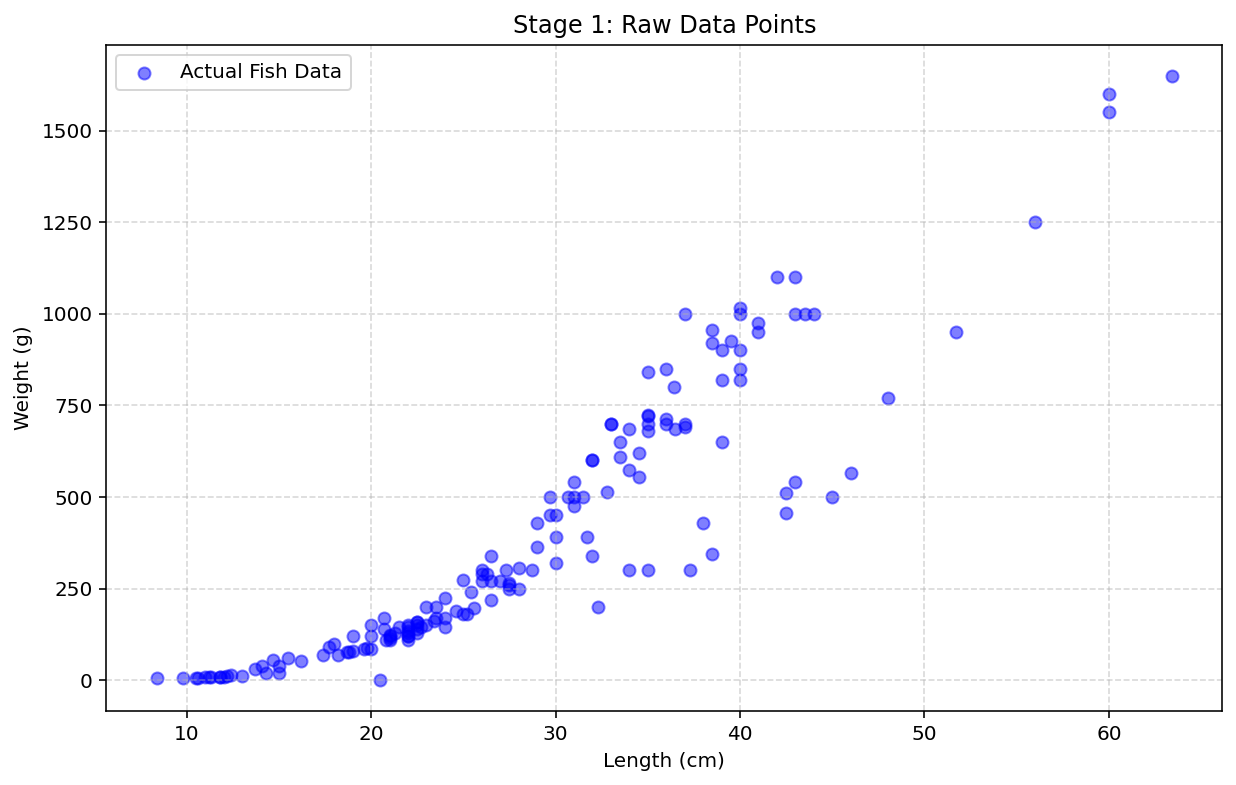

In [24]:
plt.figure(figsize=(10, 6)) # ပုံ၏ အရွယ်အစားကို သတ်မှတ်ခြင်း

# မူလဒေတာများကို အပြာရောင်အစက် (Scatter Plot) များဖြင့် ဆွဲခြင်း
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Fish Data')

plt.title('Stage 1: Raw Data Points') 
plt.xlabel('Length (cm)')              # X-axis (ငါးအလျား) နာမည်ပေးခြင်း
plt.ylabel('Weight (g)')              # Y-axis (ငါးအလေးချိန်) နာမည်ပေးခြင်း
plt.legend()                          # Label ပြရန် Legend ထည့်ခြင်း
plt.grid(True, linestyle='--', alpha=0.5) # ကြည့်ရလွယ်အောင် ဇယားကွက်လိုင်းလေးများ ထည့်ခြင်း
plt.show() # ပုံကို ထုတ်ပြခြင်း

Step 11: Linear Regression Model တည်ဆောက်ခြင်း (Model Building & Training)
-   Scikit-learn Library ထဲမှာ ပါဝင်တဲ့ Linear Regression Algorithm ကို အသုံးပြုပြီး ငါးရဲ့ အလျားနဲ့ အလေးချိန် ဆက်နွယ်မှုကို machine learning လုပ်ဆောင်တဲ့ အဆင့်ဖြစ်ပါတယ်။

In [27]:
from sklearn.linear_model import LinearRegression

# Linear Regression Model တည်ဆောက်မယ်
model = LinearRegression() # Model Object တစ်ခုကို စတင်ဖန်တီးခြင်း

# Model Training
model.fit(X, y)

LinearRegression()

Step 12: Regression Line အတွက် ခန့်မှန်းချက်များ ထုတ်ယူခြင်း (Generating Predictions for Visualization)
-   Model က သင်ယူထားတဲ့ ပုံသေနည်း (Trend) ကို မျဉ်းဖြောင့်အဖြစ် ပုံဖော်နိုင်ဖို့အတွက် ငါးအလျား အနည်းဆုံးတန်ဖိုးကနေ အများဆုံးတန်ဖိုးအထိ အချက်အလက်အသစ် (Range) တွေ ဖန်တီးပြီး အလေးချိန်ကို ခန့်မှန်းခိုင်းတဲ့ အဆင့်ဖြစ်ပါတယ်။

In [32]:
import numpy as np 

# Regression Line ဆွဲရန်အတွက် အမှတ်များ ဖန်တီးခြင်း
X_range = pd.DataFrame(
    np.linspace(X.min(), X.max(), 200), # အနည်းဆုံးနှင့် အများဆုံးကြားတွင် အမှတ် ၁၀၀ ညီတူညီမျှ ခွဲထုတ်ခြင်း
    columns=X.columns                  # မူလ Column နာမည် (Length2) အတိုင်း ပြန်ပေးခြင်း
)

# ဖန်တီးထားသော X_range အပေါ် မူတည်ပြီး အလေးချိန် (y) ကို ခန့်မှန်းခြင်း
y_pred = model.predict(X_range)

Step 13: Adding the Regression Line
-   ဒါကတော့ နောက်ဆုံးအဆင့် ဖြစ်ပါတယ်။ ကျွန်ုပ်တို့ရဲ့ Linear Regression Model ကနေ တွက်ချက်လိုက်တဲ့ "အကောင်းဆုံး မျဉ်းဖြောင့်" ကို မူလဒေတာ အစက်လေးတွေပေါ်မှာ ထပ်တင်ပြီး ပုံဖော်လိုက်တာပါ။

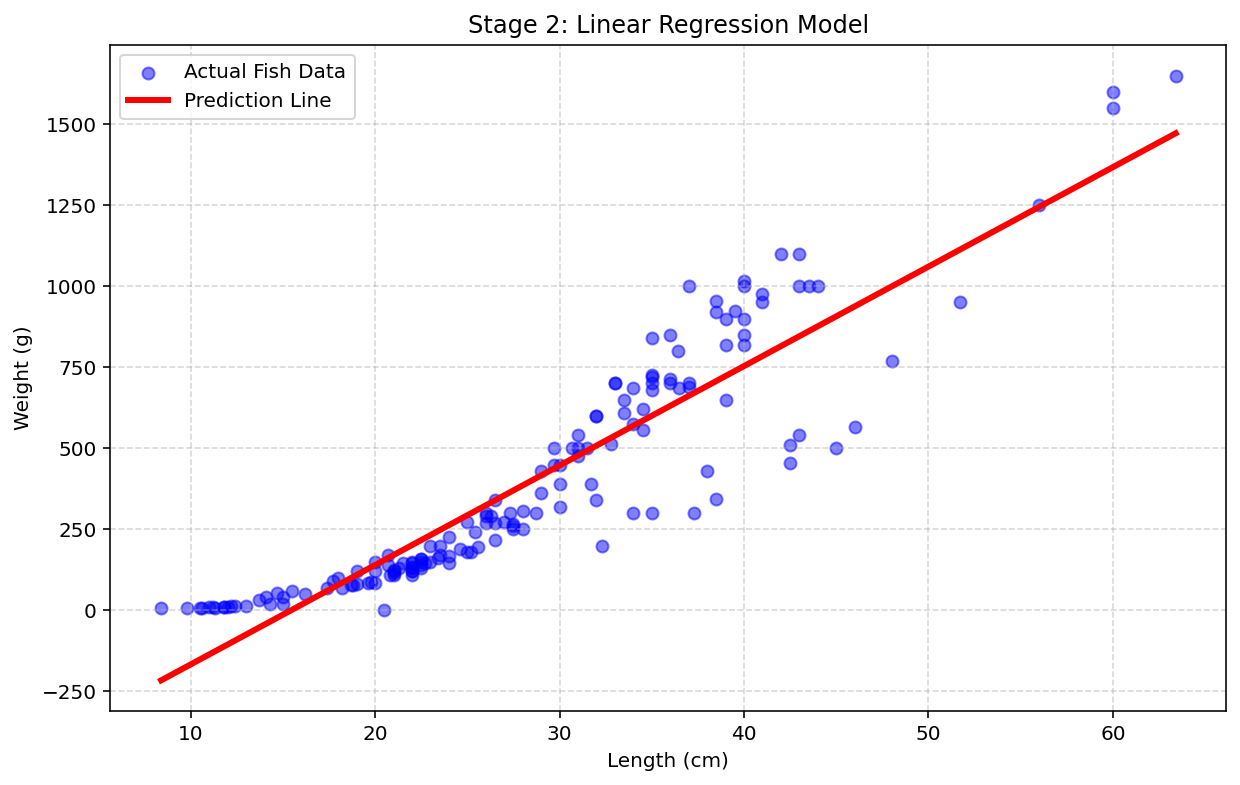

In [35]:
# Regression Line ကို ထပ်ထည့်မယ်
plt.figure(figsize=(10, 6))

# မူလ Data point များကို အပြာရောင်အစက်လေးများဖြင့် ဆွဲခြင်း
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Fish Data')

# Model က ခန့်မှန်းထားသော မျဉ်းကြောင်း (Regression Line) ကို အနီရောင်ဖြင့် ဆွဲခြင်း
plt.plot(X_range, y_pred, color='red', linewidth=3, label='Prediction Line')

plt.title('Stage 2: Linear Regression Model')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Step 14: Model Evaluation (စွမ်းဆောင်ရည်ကို တိုင်းတာစစ်ဆေးခြင်း)
-   Model တစ်ခု တည်ဆောက်ပြီးတဲ့အခါ အဲဒီ Model က ဘယ်လောက်အထိ တိကျမှုရှိသလဲ၊ ခန့်မှန်းချက်တွေနဲ့ အဖြေမှန်တွေကြားမှာ အမှား (Error) ဘယ်လောက်ရှိသလဲဆိုတာကို ကိန်းဂဏန်းတွေနဲ့ တိုင်းတာဖို့ လိုအပ်ပါတယ်။

In [38]:
from sklearn.metrics import mean_squared_error

# Metric တွက်ဖို့အတွက် မူလရှိပြီးသား X (အလျား) အားလုံးကို ပြန်လည်ခန့်မှန်းခိုင်းခြင်း
y_pred_all = model.predict(X)

# --- Metrics တွက်ချက်ခြင်း ---
# R-squared Score (Accuracy): 0 နှင့် 1 ကြားရှိပြီး 1 နှင့်နီးစပ်လျှင် ပိုကောင်းသည်
accuracy = model.score(X, y) 

# MSE နှင့် RMSE (အမှားတန်ဖိုးကို ရှာဖွေခြင်း)
mse = mean_squared_error(y, y_pred_all)
rmse = np.sqrt(mse) # Mean Squared Error ကို Square root ပြန်ယူခြင်း

print(f" R2 Score: {accuracy:.4f} ")
print(f"RMSE: {rmse:.4f} grams")

 R2 Score: 0.8439 
RMSE: 141.0087 grams


### Multi-Linear Regression

Step 15: Multiple Linear Regression (Features များစွာ အသုံးပြုခြင်း)
-   အရင်အဆင့်မှာ ငါးရဲ့အလျား (Length2) တစ်ခုတည်းကိုပဲ သုံးခဲ့ပေမဲ့၊ အခုတစ်ခါမှာတော့ ငါးရဲ့ ကိုယ်ထည်အတိုင်းအတာအားလုံး (အလျား ၃ မျိုး၊ အမြင့်၊ အနံ) ကို Features အဖြစ် အသုံးပြုပြီး ပိုမိုတိကျတဲ့ Model တစ်ခု တည်ဆောက်မှာ ဖြစ်ပါတယ်။ ဒါကို Multiple Linear Regression လို့ ခေါ်ပါတယ်။

In [42]:
# ငါး၏ အလေးချိန် ကို predict လုပ်ဖို့ feature ၅ ခုလုံးကို X အဖြစ် သတ်မှတ်ခြင်း
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]

# ခန့်မှန်းလိုသည့် အဖြေ (Target)
y = df['Weight']

# Data ရဲ့ ပုံစံကို စစ်ဆေးခြင်း
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

display(X.head())  # Features ၏ ပထမဆုံး ၅ ကြောင်းကို ပြရန်

Features (X) shape: (159, 5)
Target (y) shape: (159,)


,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


Step 16: Multiple Linear Regression (MLR) Model ကို သင်ကြားပေးခြင်း
-   ယခုအဆင့်မှာတော့ Features ၅ ခုလုံးကို အသုံးပြုပြီး Multiple Linear Regression Model ကို တည်ဆောက်မှာ ဖြစ်ပါတယ်။ Feature တစ်ခုတည်း သုံးတာနဲ့ မတူဘဲ Model က Variable အားလုံးရဲ့ ဆက်စပ်မှုကို တစ်ပြိုင်နက် တွက်ချက်သွားမှာပါ။

In [45]:
from sklearn.linear_model import LinearRegression
# Linear Regression Model တည်ဆောက်မယ်
mlr_model = LinearRegression() # Model Object တစ်ခုကို စတင်ဖန်တီးခြင်း

# Model Training
mlr_model.fit(X, y)

LinearRegression()

Step 16: Making Predictions

In [48]:
# Multiple Linear Regression Model ကို သုံးပြီး အလေးချိန်များကို ခန့်မှန်းခြင်း
y_pred = mlr_model.predict(X)

# ခန့်မှန်းချက် အချို့ကို ထုတ်ကြည့်ခြင်း
print("First 5 Predictions:", y_pred[:5])

First 5 Predictions: [326.81612777 369.57859339 370.82418025 439.05613854 444.16916821]


In [50]:
print(mlr_model.coef_)      # Weight ၅ ခု ထွက်လာမယ် [w1, w2, w3, w4, w5]
print(mlr_model.intercept_) # Intercept w0 ထွက်လာမယ်

[ 62.35521443  -6.52675249 -29.02621861  28.29735132  22.47330665]
-499.58695535694164


Step 17: Visualization (Actual vs Predicted Plot)
-   Multiple Linear Regression မှာ Feature တွေ များတဲ့အတွက် Model ရဲ့ တိကျမှုကို သိနိုင်ဖို့ "အဖြေမှန် (Actual)" နဲ့ "ခန့်မှန်းချက် (Predicted)" ဘယ်လောက်နီးစပ်သလဲဆိုတာကို နှိုင်းယှဉ်ပြတဲ့ ပုံကို ဆွဲကြည့်ရမှာ ဖြစ်ပါတယ်။

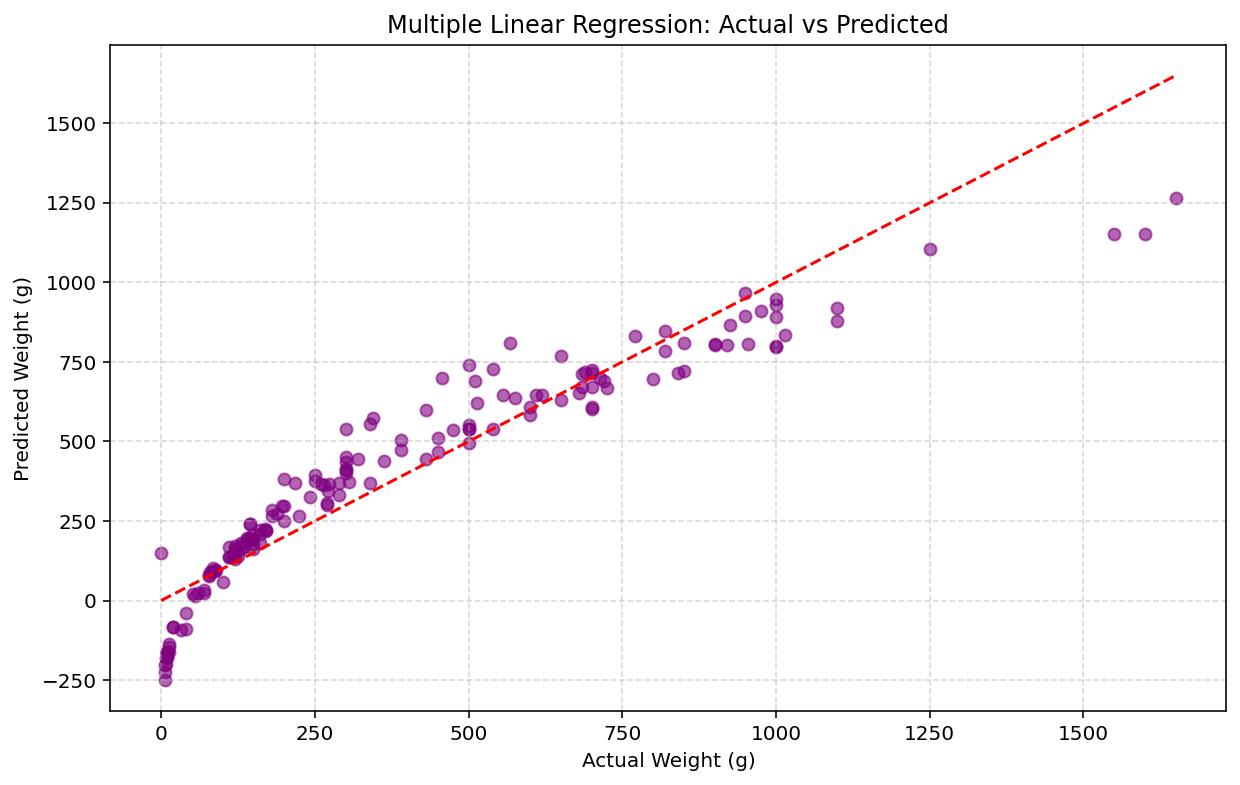

In [58]:
# Visualization (Actual vs Predicted Plot)
plt.figure(figsize=(10, 6))

# Actual (y) ကို X-axis မှာထားပြီး Predicted (y_pred) ကို Y-axis မှာထား၍ အစက်ချခြင်း
plt.scatter(y, y_pred, color='purple', alpha=0.6)

# အဖြေမှန်နှင့် ခန့်မှန်းချက် တထပ်တည်းကျမည့် မျဉ်းကြောင်း (Ideal Line) ကို ဆွဲခြင်း
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

plt.xlabel('Actual Weight (g)')   # အဖြေမှန် (ငါးအလေးချိန် အစစ်အမှန်)
plt.ylabel('Predicted Weight (g)') # ခန့်မှန်းချက် (Model က တွက်ပေးသော အလေးချိန်)
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()

Step 16: Multiple Linear Regression ၏ စွမ်းဆောင်ရည်ကို တိုင်းတာခြင်း (Final Evaluation)
-   ဒီအဆင့်မှာတော့ Feature ၅ ခုလုံးကို သုံးထားတဲ့ Model ရဲ့ တိကျမှုကို ကိန်းဂဏန်းတွေနဲ့ အတည်ပြုမှာ ဖြစ်ပါတယ်။ အရင်က Feature ၁ ခုတည်း သုံးခဲ့တဲ့ Model နဲ့ နှိုင်းယှဉ်ရင် ဘယ်လောက် ပိုကောင်းလာသလဲဆိုတာကို သိနိုင်ပါတယ်။

In [56]:
from sklearn.metrics import mean_squared_error

# R-squared (Accuracy)
accuracy = mlr_model.score(X, y) 

# RMSE (Root Mean Square Error)
# ခန့်မှန်းချက်နှင့် အဖြေမှန်ကြားရှိ ပျမ်းမျှအမှား (ယူနစ်မှာ grams ဖြစ်သည်)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {accuracy:.4f}")
print(f"RMS Error: {rmse:.4f} grams")

R2 Score: 0.8853
RMS Error: 120.8631 grams
